In [102]:
import pandas as pd

df = pd.read_csv("weather_data.csv")
df

,date,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,soil_Temp
0,2018-01-01 01:00,-6.9,-7.6,74.7,151.5,0.7,0.0,0.0,0.0,0.0,-0.2
1,2018-01-01 02:00,-6.9,-7.9,78.8,177.1,0.5,0.0,0.0,0.0,0.0,-0.2
2,2018-01-01 03:00,-6.9,-8.1,80.2,164.4,0.5,0.0,0.0,0.0,0.0,-0.3
3,2018-01-01 04:00,-6.9,-8.7,82.1,161.1,0.7,0.0,0.0,0.0,0.0,-0.3
4,2018-01-01 05:00,-6.9,-9.2,82.2,200.7,0.2,0.0,0.0,0.0,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...
24748,2024-05-08 15:00,17.8,5.7,48.8,263.3,0.6,0.0,234.0,14.5,513.0,15.9
24749,2024-05-08 17:00,18.0,5.7,53.9,189.2,0.8,0.0,329.0,17.7,513.0,16.3
24750,2024-05-09 17:00,23.0,3.8,38.7,243.7,1.5,0.0,594.0,25.4,509.0,16.7
24751,2024-05-11 03:00,11.8,9.5,78.7,158.1,0.8,0.0,0.0,0.0,0.0,15.2


In [103]:
# 각 피해의 기준 탐색 
# 냉해/동해 : 영하 7~8도 (https://m.blog.naver.com/daeyu6293/222585708086)
# 습해 : 18일~21일까지 97.5mm (https://www.gangjin.go.kr/www/government/press?idx=610055&page=27&mode=view)
# - 올해 1~2월(2.21.기준) 누적 강수량은 164㎜로 전년 대비 142%, 일조량은 245시간으로 전년 대비 약 23% 부족
# 가뭄 : (https://hydro.kma.go.kr/warn/inte_news.do)
#        (https://www.idaegu.co.kr/news/articleView.html?idxno=413758)
# - 평년 892.1mm 대비 25.2% 부족한 666.9mm

In [104]:
#1. 냉해 파악 : 1~2월을 눈여겨보자
# 판단 조건 : 온도가 -7도 이하인 날 개수
cold_days = df[df["min_Temp"] <= -7]
cold_days
# date 열을 보고 year 열 생성
cold_days["date"] = pd.to_datetime(cold_days["date"])
cold_days["year"] = cold_days["date"].dt.year
cold_days["month"] = cold_days["date"].dt.month
cold_days


C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\3930388141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold_days["date"] = pd.to_datetime(cold_days["date"])
C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\3930388141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold_days["year"] = cold_days["date"].dt.year
C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\3930388141.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,date,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,soil_Temp,year,month
0,2018-01-01 01:00:00,-6.9,-7.6,74.7,151.5,0.7,0.0,0.0,0.0,0.0,-0.2,2018,1
1,2018-01-01 02:00:00,-6.9,-7.9,78.8,177.1,0.5,0.0,0.0,0.0,0.0,-0.2,2018,1
2,2018-01-01 03:00:00,-6.9,-8.1,80.2,164.4,0.5,0.0,0.0,0.0,0.0,-0.3,2018,1
3,2018-01-01 04:00:00,-6.9,-8.7,82.1,161.1,0.7,0.0,0.0,0.0,0.0,-0.3,2018,1
4,2018-01-01 05:00:00,-6.9,-9.2,82.2,200.7,0.2,0.0,0.0,0.0,0.0,-0.5,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24537,2024-03-27 14:00:00,20.0,-10.4,54.2,246.5,1.8,0.0,384.0,14.5,566.0,7.8,2024,3
24538,2024-03-27 16:00:00,20.0,-10.4,48.1,258.3,1.4,0.0,504.0,18.0,566.0,8.7,2024,3
24539,2024-03-27 18:00:00,20.0,-10.4,65.5,0.0,0.0,0.0,537.0,19.1,566.0,9.1,2024,3
24540,2024-03-27 21:00:00,20.0,-10.4,87.0,155.1,0.6,0.0,537.0,19.2,566.0,9.1,2024,3


In [105]:
# year가 2018이고 month가 10인 자료부터, year가 2019이고 month가 6인 자료까지의 데이터 추출
cold_days = cold_days[(cold_days["year"] == 2018) & (cold_days["month"] >= 10) | (cold_days["year"] == 2019) & (cold_days["month"] <= 6)]
cold_days.shape[0]

496

In [106]:
# 이어서 2019년 10월부터 2020년 6월까지의 데이터 추출
cold_days = df[(df["date"] >= "2019-10-01") & (df["date"] <= "2020-06-30")]
cold_days = cold_days[cold_days["min_Temp"] <= -7]
cold_days.shape[0]

274

In [107]:
# for문으로 작성해보자!
cold=[]
df["date"] = pd.to_datetime(df["date"])
for i in range(2018, 2024):
    cold_days = df[(df["date"] >= f"{i}-10-01") & (df["date"] <= f"{i+1}-06-30")]
    cold_days = cold_days[cold_days["min_Temp"] <= -7]
    print(f"{i}년 : {int(cold_days.shape[0]/24)}일")
    cold.append(int(cold_days.shape[0]/24))

2018년 : 20일
2019년 : 11일
2020년 : 21일
2021년 : 26일
2022년 : 24일
2023년 : 16일


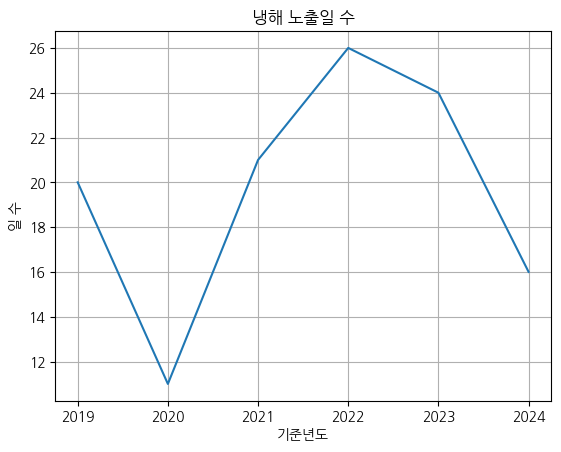

In [108]:
# 냉해 노출일 수 시각화
X = [2019, 2020, 2021, 2022, 2023, 2024]
Y = [20,11,21,26,24,16]

import matplotlib.pyplot as plt
import koreanize_matplotlib
# plot으로 그래프 그리기
plt.plot(X, Y)
plt.title("냉해 노출일 수")
plt.xlabel("기준년도")
plt.ylabel("일 수")
plt.grid()
plt.show()

In [109]:
#2. 습해
# 기준 : 일단, 그 해 10월부터 다음해 6월까지 내린 강수량의 총합을 살펴보자!
# for문으로 작성해보자!
rain_total=[]
df["date"] = pd.to_datetime(df["date"])
for i in range(2018, 2024):
    rain = df[(df["date"] >= f"{i}-10-01") & (df["date"] <= f"{i+1}-06-30")]
    print(f"{i}년 : {rain.rain.sum()}mm/year")
    rain_total.append(rain.rain.sum())

2018년 : 1855.0mm/year
2019년 : 2855.5mm/year
2020년 : 2067.5mm/year
2021년 : 1711.0mm/year
2022년 : 3101.0mm/year
2023년 : 1897.5mm/year


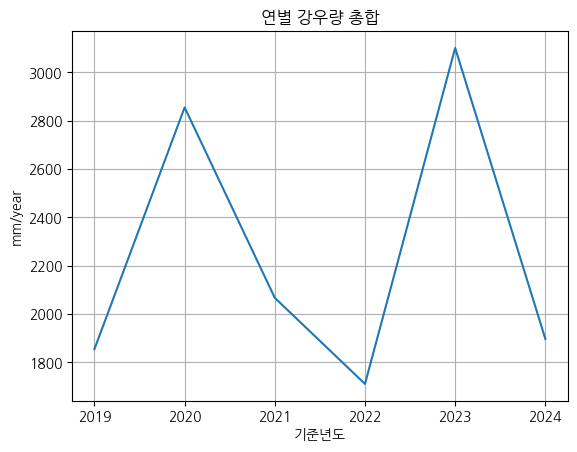

In [110]:
# 시각화
X=[2019,2020,2021,2022,2023,2024]
Y=[1855,2855,2067,1711,3101,1897]
# plot으로 그래프 그리기
plt.plot(X, Y)
plt.title("연별 강우량 총합")
plt.xlabel("기준년도")
plt.ylabel("mm/year")
plt.grid()
plt.show()

In [111]:
# 1~2월 누적 강수량
rain_avg=[]
for i in range(2018, 2024):
    rain = df[(df["date"] >= f"{i+1}-01-01") & (df["date"] <= f"{i+1}-02-28")]
    print(f"{i+1}년 1~2월 평균 누적 강수량 : {rain.rain.sum()/2}mm")
    rain_avg.append(rain.rain.sum()/2)

2019년 1~2월 평균 누적 강수량 : 88.5mm
2020년 1~2월 평균 누적 강수량 : 319.5mm
2021년 1~2월 평균 누적 강수량 : 78.5mm
2022년 1~2월 평균 누적 강수량 : 0.0mm
2023년 1~2월 평균 누적 강수량 : 71.75mm
2024년 1~2월 평균 누적 강수량 : 249.5mm


In [112]:
# 데이터 붙이기
accumulation = df.head(1)
for i in range(2018, 2024):
    cache = df[(df["date"] >= f"{i}-10-01") & (df["date"] <= f"{i+1}-06-30")]
    cache["cold"]=cold[i-2018]
    cache["rain_total"]=rain_total[i-2018]
    cache["rain_avg"]=rain_avg[i-2018]
    accumulation = pd.concat([accumulation, cache])
    

C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\2353124505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache["cold"]=cold[i-2018]
C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\2353124505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cache["rain_total"]=rain_total[i-2018]
C:\Users\mathn\AppData\Local\Temp\ipykernel_28000\2353124505.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [113]:
accumulation.drop(0, inplace=True)
accumulation.reset_index(drop=True, inplace=True)

In [114]:
accumulation

,date,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,soil_Temp,cold,rain_total,rain_avg
0,2018-10-01 07:00:00,11.3,7.2,93.9,154.8,0.8,0.0,0.0,0.0,251.0,16.5,20.0,1855.0,88.5
1,2018-10-01 08:00:00,12.4,7.2,83.8,83.3,0.2,0.0,26.0,0.5,311.0,16.4,20.0,1855.0,88.5
2,2018-10-01 09:00:00,13.4,7.2,76.4,224.1,1.7,0.0,27.0,0.9,331.0,16.5,20.0,1855.0,88.5
3,2018-10-01 10:00:00,13.4,7.2,76.7,288.9,1.8,0.0,30.0,1.4,391.0,16.7,20.0,1855.0,88.5
4,2018-10-01 11:00:00,15.8,7.2,66.3,297.5,3.2,0.0,88.0,4.0,408.0,17.0,20.0,1855.0,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16906,2024-05-08 15:00:00,17.8,5.7,48.8,263.3,0.6,0.0,234.0,14.5,513.0,15.9,16.0,1897.5,249.5
16907,2024-05-08 17:00:00,18.0,5.7,53.9,189.2,0.8,0.0,329.0,17.7,513.0,16.3,16.0,1897.5,249.5
16908,2024-05-09 17:00:00,23.0,3.8,38.7,243.7,1.5,0.0,594.0,25.4,509.0,16.7,16.0,1897.5,249.5
16909,2024-05-11 03:00:00,11.8,9.5,78.7,158.1,0.8,0.0,0.0,0.0,0.0,15.2,16.0,1897.5,249.5
